In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [6]:
df=pd.read_csv('./Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df.shape

(1025, 14)

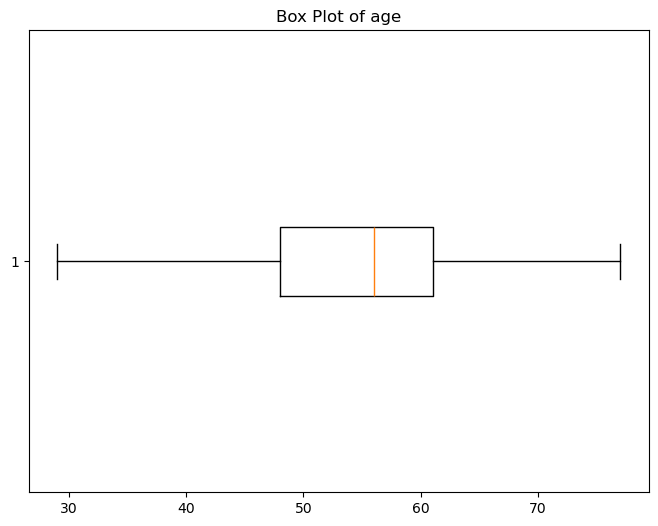

Outliers in 'age':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


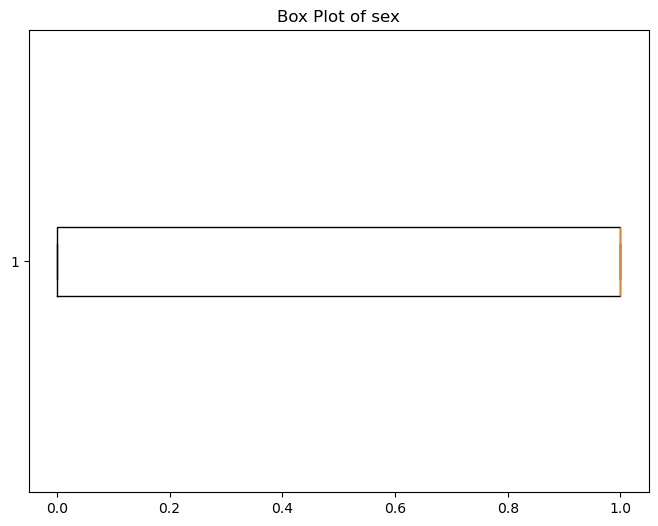

Outliers in 'sex':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


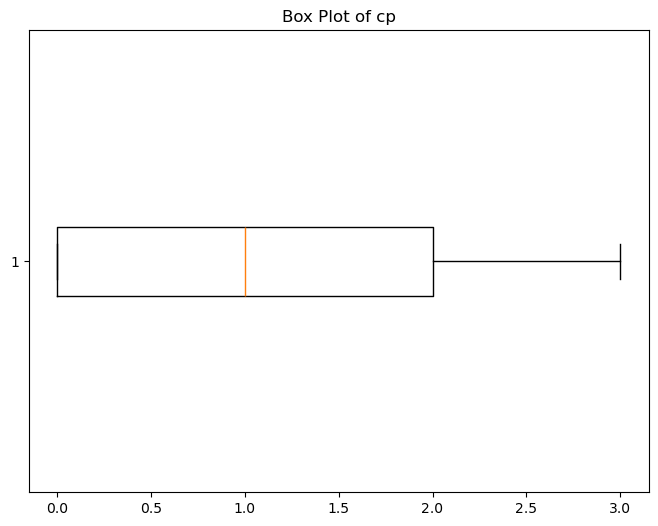

Outliers in 'cp':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


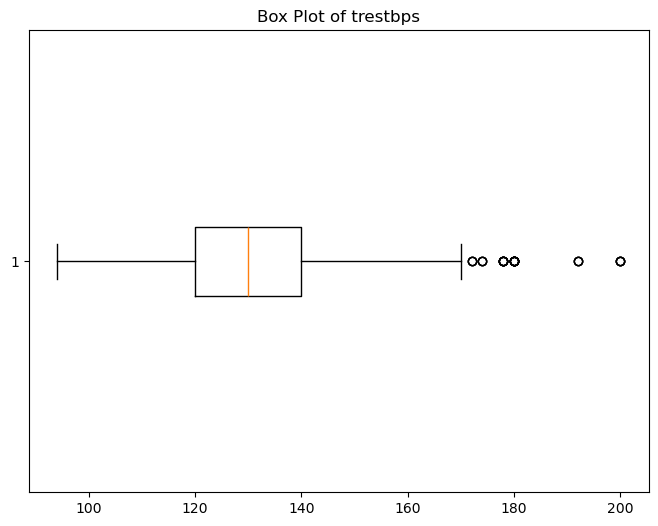

Outliers in 'trestbps':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
29    55    0   0       180   327    0        2      117      1      3.4   
47    66    0   0       178   228    1        1      165      1      1.0   
87    59    0   0       174   249    0        1      143      1      0.0   
137   64    0   0       180   325    0        1      154      1      0.0   
151   54    1   1       192   283    0        0      195      0      0.0   
175   56    0   0       200   288    1        0      133      1      4.0   
229   66    0   0       178   228    1        1      165      1      1.0   
246   54    1   1       192   283    0        0      195      0      0.0   
257   64    0   0       180   325    0        1      154      1      0.0   
294   56    0   0       200   288    1        0      133      1      4.0   
326   54    1   1       192   283    0        0      195      0      0.0   
343   52    1   2       172   199    1        1      162      0 

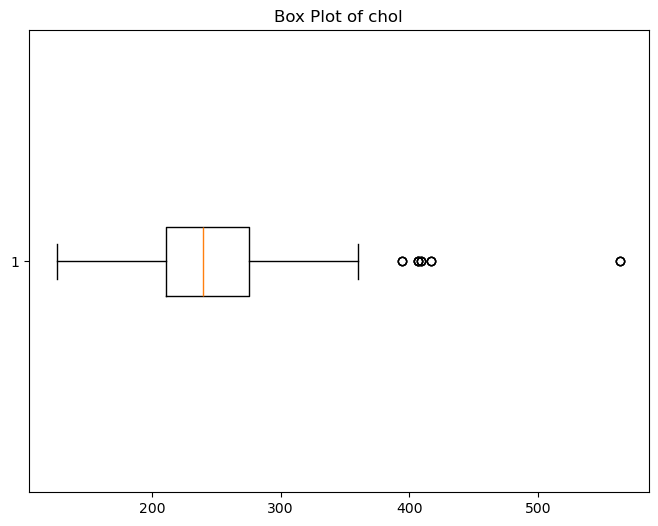

Outliers in 'chol':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
192   67    0   2       115   564    0        0      160      0      1.6   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   
464   67    0   2       115   564    0        0      160      0      1.6   
481   63    0   0       150   407    0        0      154      0      4.0   
542   62    0   0       140   394    0        0      157      0      1.2   
578   62    0   0       140   394    0        0      157      0      1.2   
641   56    0   0       134   409    0        0      150      1      1.9   
665   65    0   2       140   417    1        0      157      0     

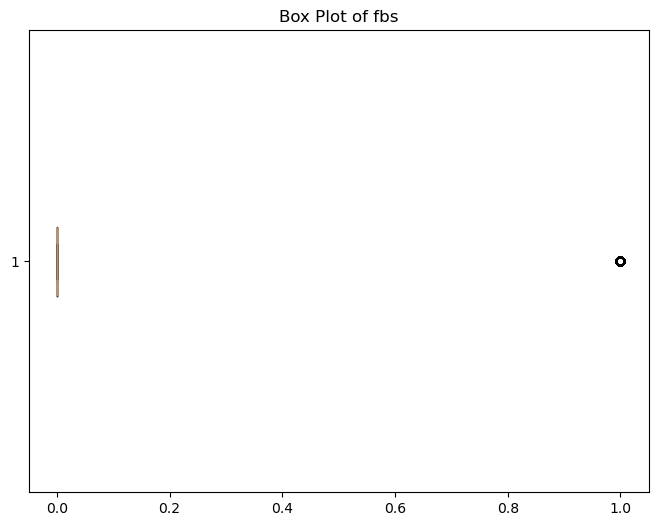

Outliers in 'fbs':
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1      53    1   0       140   203    1        0      155      1      3.1   
4      62    0   0       138   294    1        1      106      0      1.9   
11     43    0   0       132   341    1        0      136      1      3.0   
14     52    1   0       128   204    1        1      156      1      1.0   
19     58    1   2       140   211    1        0      165      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
993    43    1   0       132   247    1        0      143      1      0.1   
999    67    1   0       125   254    1        1      163      0      0.2   
1003   52    1   0       108   233    1        1      147      0      0.1   
1006   58    1   2       140   211    1        0      165      0      0.0   
1016   65    1   3       138   282    1        0      174      0      1.4   

      slope  ca  thal  target  
1         0   0     3   

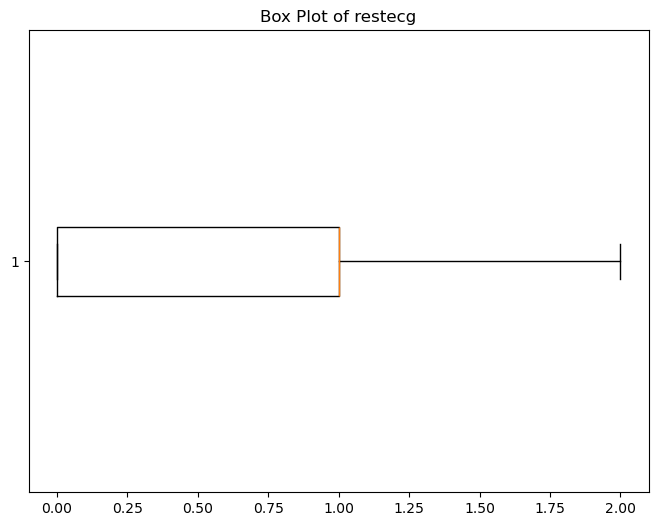

Outliers in 'restecg':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


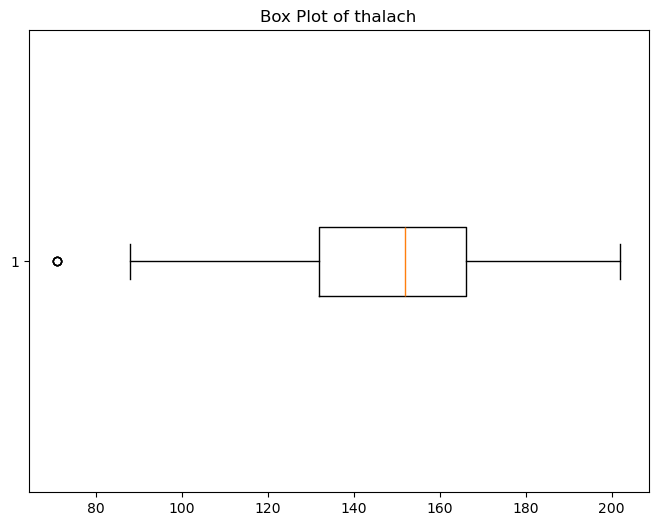

Outliers in 'thalach':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
267   67    1   0       120   237    0        1       71      0      1.0   
296   67    1   0       120   237    0        1       71      0      1.0   
378   67    1   0       120   237    0        1       71      0      1.0   
559   67    1   0       120   237    0        1       71      0      1.0   

     slope  ca  thal  target  
267      1   0     2       0  
296      1   0     2       0  
378      1   0     2       0  
559      1   0     2       0  


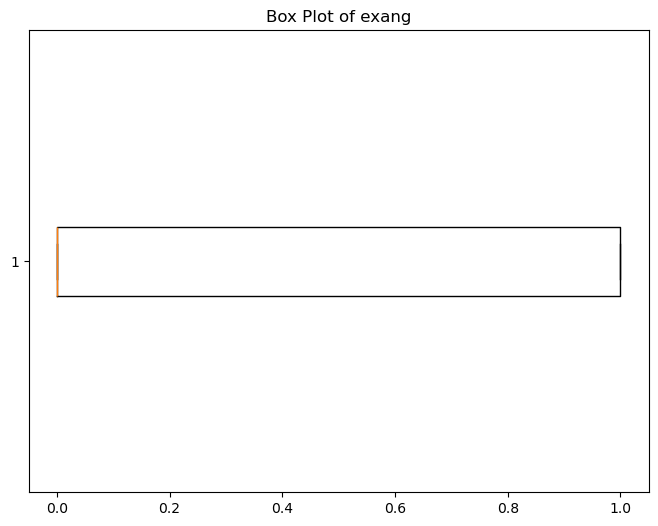

Outliers in 'exang':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


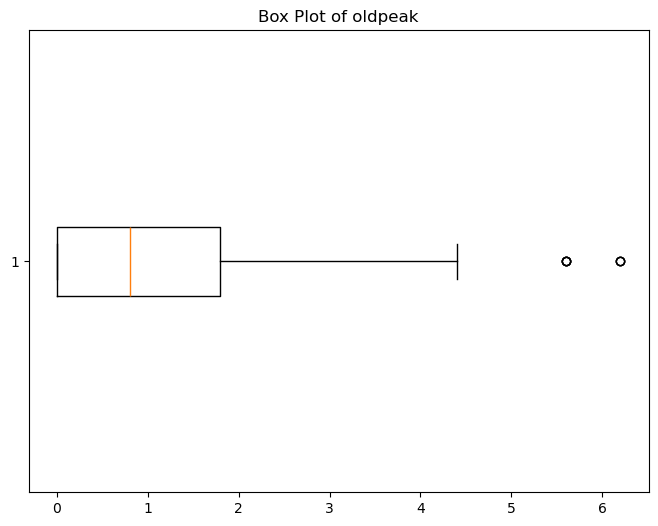

Outliers in 'oldpeak':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
54    55    1   0       140   217    0        1      111      1      5.6   
55    55    1   0       140   217    0        1      111      1      5.6   
69    62    0   0       160   164    0        0      145      0      6.2   
393   62    0   0       160   164    0        0      145      0      6.2   
526   62    0   0       160   164    0        0      145      0      6.2   
613   55    1   0       140   217    0        1      111      1      5.6   
833   55    1   0       140   217    0        1      111      1      5.6   

     slope  ca  thal  target  
54       0   0     3       0  
55       0   0     3       0  
69       0   3     3       0  
393      0   3     3       0  
526      0   3     3       0  
613      0   0     3       0  
833      0   0     3       0  


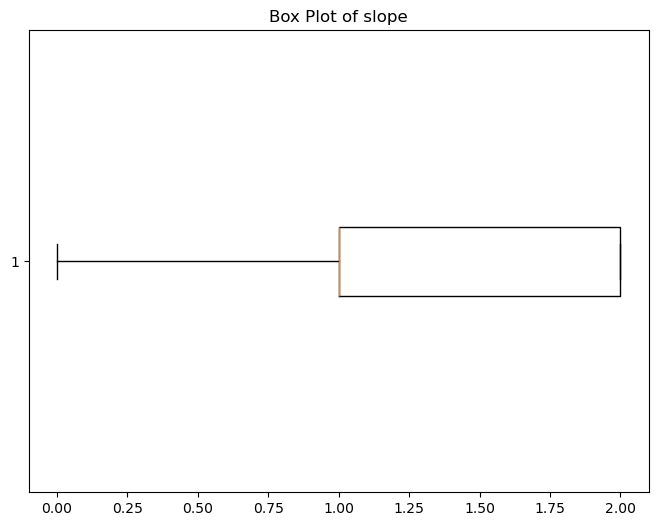

Outliers in 'slope':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


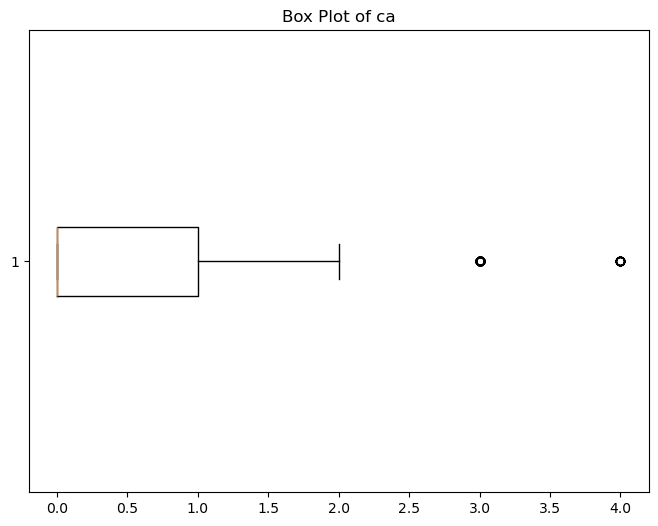

Outliers in 'ca':
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
4      62    0   0       138   294    1        1      106      0      1.9   
6      58    1   0       114   318    0        2      140      0      4.4   
13     51    1   0       140   298    0        1      122      1      4.2   
52     38    1   2       138   175    0        1      173      0      0.0   
53     49    1   2       120   188    0        1      139      0      2.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
985    62    1   2       130   231    0        1      146      0      1.8   
993    43    1   0       132   247    1        0      143      1      0.1   
1003   52    1   0       108   233    1        1      147      0      0.1   
1013   58    1   0       114   318    0        2      140      0      4.4   
1015   58    1   0       128   216    0        0      131      1      2.2   

      slope  ca  thal  target  
4         1   3     2    

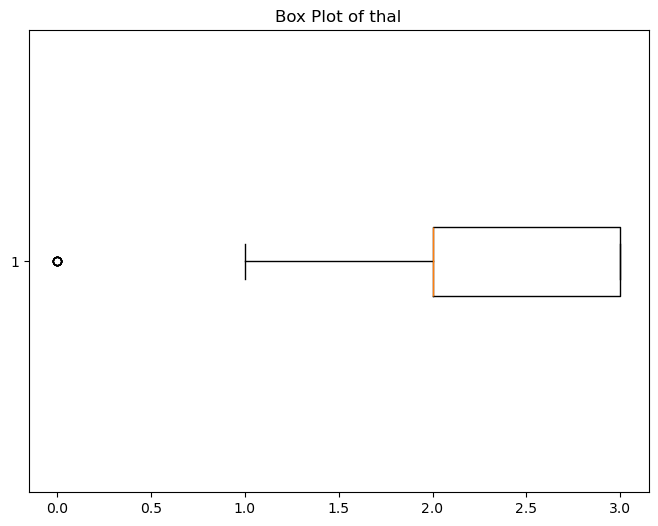

Outliers in 'thal':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
14    52    1   0       128   204    1        1      156      1      1.0   
319   53    0   2       128   216    0        0      115      0      0.0   
329   53    0   2       128   216    0        0      115      0      0.0   
359   53    0   2       128   216    0        0      115      0      0.0   
686   52    1   0       128   204    1        1      156      1      1.0   
734   52    1   0       128   204    1        1      156      1      1.0   
893   52    1   0       128   204    1        1      156      1      1.0   

     slope  ca  thal  target  
14       1   0     0       0  
319      2   0     0       1  
329      2   0     0       1  
359      2   0     0       1  
686      1   0     0       0  
734      1   0     0       0  
893      1   0     0       0  


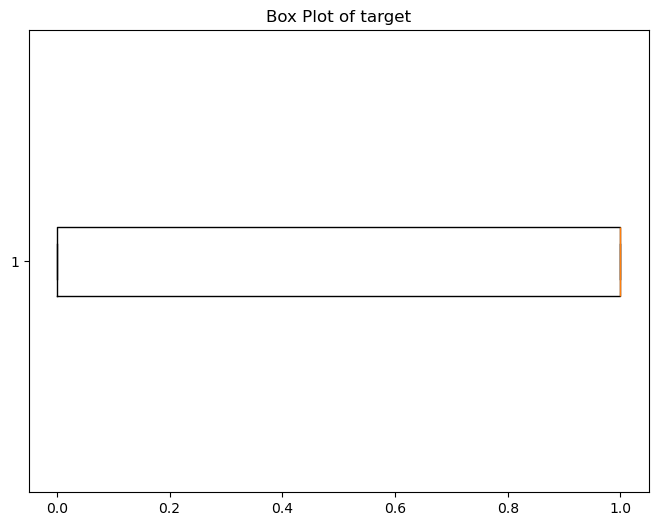

Outliers in 'target':
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset is loaded into the DataFrame called 'df'
# Replace 'df' with your actual DataFrame name if different.
# List of columns with numeric data
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Function to detect and visualize outliers using box plots
def detect_and_visualize_outliers(data_frame, column_name):
# Create a box plot for the given column
    plt.figure(figsize=(8, 6))
    plt.boxplot(data_frame[column_name], vert=False)
    plt.title(f'Box Plot of {column_name}')
    plt.show()
    # Calculate the Interquartile Range (IQR) for the column
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3- Q1
    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1- 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find and display the outliers
    outliers = data_frame[(data_frame[column_name] < lower_bound)|(data_frame[column_name] > upper_bound)]
    print(f"Outliers in '{column_name}':")
    print(outliers)
    # Loop through each numeric column and visualize outliers
for col in numeric_columns:
    detect_and_visualize_outliers(df, col)

In [16]:
x=df.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [17]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [18]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25)

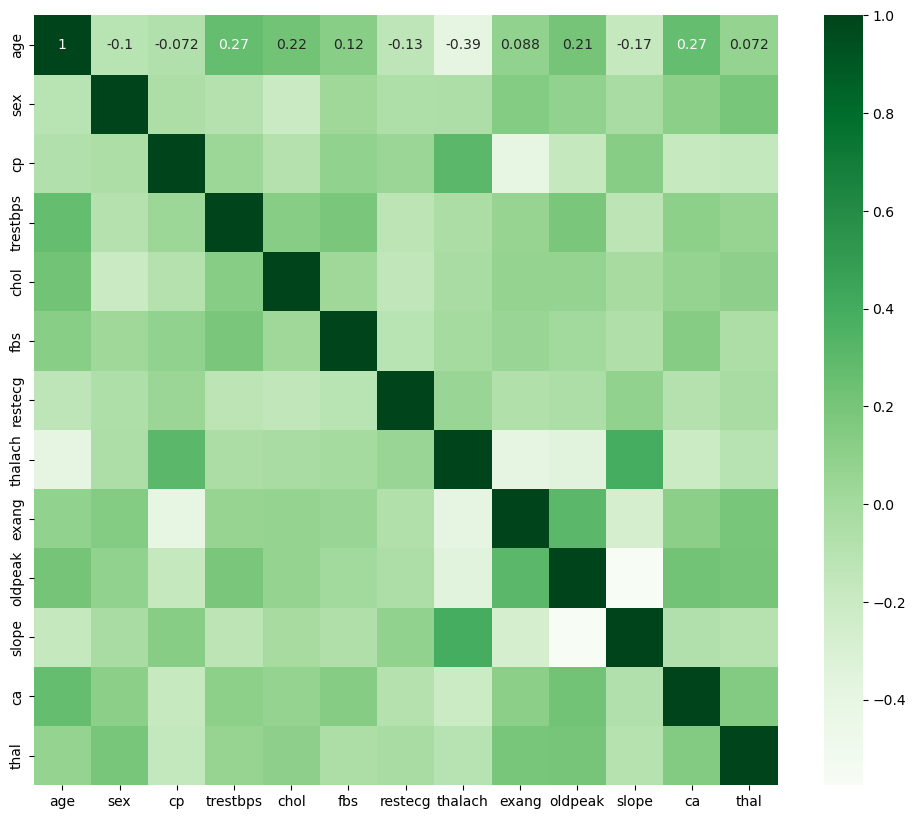

In [19]:
plt.figure(figsize=(12,10))
cor=x.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the dataset and perform train-test split (replace with your data loading process)
# Assuming 'df' contains the dataset with the features and target 'target'
# For example:
# df = pd.read_csv('your_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Print the results
# Confusion Matrix
print("Test Accuracy:", test_accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 1.0
Confusion Matrix:
[[132   0]
 [  0 125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       125

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
#Loadthedatasetandperformtrain-testsplit(replacewithyourdataloading process)
#Assuming'df' containsthedatasetwiththefeaturesandtarget'target'
#Forexample:
#df=pd.read_csv('your_dataset.csv')
X =df.drop(columns=['target'])
y =df['target']
#Split the data intotrainingandtestingsets
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=42)
#CreateaRandomForestclassifier
rf_classifier =RandomForestClassifier(n_estimators=100,random_state=42)
#Limit the maximum depthofthetreestocontroloverfitting
rf_classifier.set_params(max_depth=10)
#Increaseminimumsamplerequirementstopreventoverfitting
rf_classifier.set_params(min_samples_split=5,min_samples_leaf=2)
#Perform cross-validationtofindtheoptimalnumberoftrees
cv_scores =cross_val_score(rf_classifier,X_train,y_train,cv=5)
 # Get the average cross-validation score and choose the number of trees accordingly
n_estimators = int(cv_scores.mean() * 100)
 # Set the number of trees for the final model
rf_classifier.set_params(n_estimators=n_estimators)
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Print the results
print("Optimal number of trees:", n_estimators)
print("Test Accuracy:", test_accuracy)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
 # Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Optimal number of trees: 95
Test Accuracy: 0.9766536964980544
Confusion Matrix:
[[129   3]
 [  3 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.98      0.98      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# Load the dataset and perform train-test split (replace with your data loading process)
# Assuming 'df' contains the dataset with the features and target 'target'
# For example:
# df = pd.read_csv('your_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Perform GridSearchCV to find the best hyperparameters
param_grid = {
'n_estimators': [50, 100, 150],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Get the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
# Fit the best model to the training data
best_rf_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Print the results
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.9883268482490273
Confusion Matrix:
[[132   0]
 [  3 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Step 1: Load the dataset
# Replace this with your actual dataset loading process
# Assuming 'df' contains the dataset with the features and target 'cardio'
# For example:
# df = pd.read_csv('your_dataset.csv')
# Step 2: Data Preprocessing (if needed)
24
# If needed, perform data preprocessing steps here, such as encoding categorical variables, scaling, etc.
# Step 3: Train-Test Split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Step 4: Train the Random Forest Classifier with Regularization
# Apply regularization hyperparameters
model_rf_l1 = RandomForestClassifier(min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
model_rf_l1.fit(X_train, y_train)
model_rf_l2 = RandomForestClassifier(min_samples_split=10, min_samples_leaf=5, max_features='log2', random_state=42)
model_rf_l2.fit(X_train, y_train)
 # Step 5: Evaluate the models
y_pred_rf_l1 = model_rf_l1.predict(X_test)
y_pred_rf_l2 = model_rf_l2.predict(X_test)
accuracy_rf_l1 = accuracy_score(y_test, y_pred_rf_l1)
accuracy_rf_l2 = accuracy_score(y_test, y_pred_rf_l2)
print("Accuracy with L1 Regularization (Random Forest):", accuracy_rf_l1)
print("Accuracy with L2 Regularization (Random Forest):", accuracy_rf_l2)
# Step 6: Calculate and compare the confusion matrices
conf_matrix_rf_l1 = confusion_matrix(y_test, y_pred_rf_l1)
conf_matrix_rf_l2 = confusion_matrix(y_test, y_pred_rf_l2)
print("Confusion Matrix with L1 Regularization (Random Forest):")
print(conf_matrix_rf_l1)
print("Confusion Matrix with L2 Regularization (Random Forest):")
print(conf_matrix_rf_l2)

Accuracy with L1 Regularization (Random Forest): 0.9688715953307393
Accuracy with L2 Regularization (Random Forest): 0.914396887159533
Confusion Matrix with L1 Regularization (Random Forest):
[[127   5]
 [  3 122]]
Confusion Matrix with L2 Regularization (Random Forest):
[[119  13]
 [  9 116]]


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
# Load the dataset and perform train-test split (replace with your data loading process)
# Assuming 'df' contains the dataset with the features and target 'target'
# For example:
# df = pd.read_csv('your_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Data augmentation using resampling (assuming class imbalance)
# Create a Random Forest classifier
X_train_augmented, y_train_augmented = resample(X_train[y_train == 1], y_train[y_train == 1],
n_samples=X_train[y_train == 0].shape[0],replace=True, random_state=42)
# Concatenate the augmented data with the original data
X_train_augmented = pd.concat([X_train[y_train == 0], X_train_augmented])
y_train_augmented = pd.concat([y_train[y_train == 0], y_train_augmented])
rf_classifier = RandomForestClassifier(random_state=42)
# Perform GridSearchCV to find the best hyperparameters
param_grid = {
'n_estimators': [50, 100, 150],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_augmented, y_train_augmented)
# Get the best hyperparameters
best_rf_model = grid_search.best_estimator_
# Fit the best model to the training data
best_rf_model.fit(X_train_augmented, y_train_augmented)
# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Print the results
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.9610894941634242
Confusion Matrix:
[[132   0]
 [ 10 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       132
           1       1.00      0.92      0.96       125

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



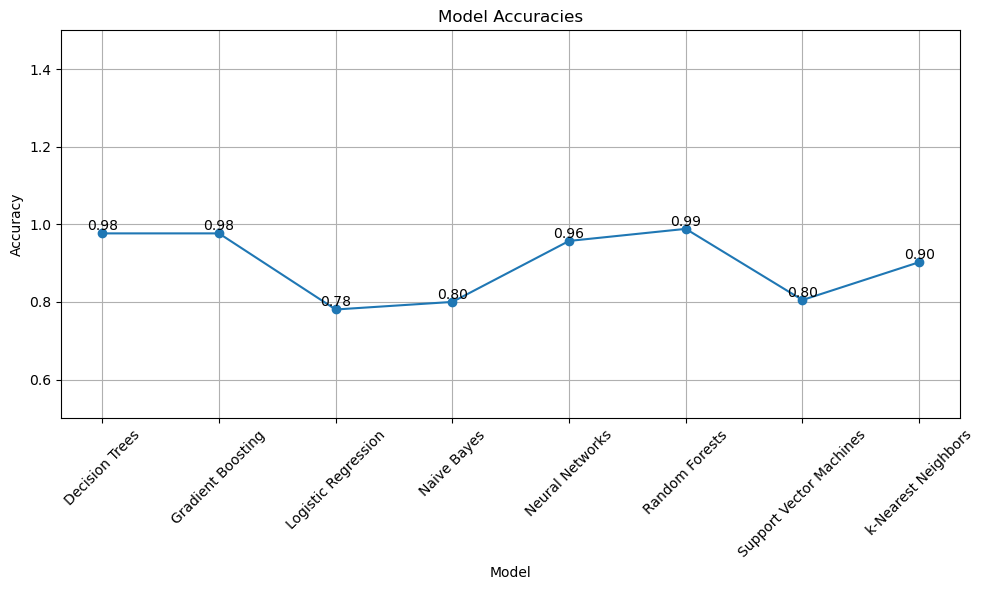

In [25]:
import matplotlib.pyplot as plt
# Accuracy values for each model
models = {
'Logistic Regression': 0.7804878048780488,
'Support Vector Machines': 0.8048780487804879,
'Decision Trees': 0.9766536964980544,
'Random Forests': 0.9883268482490273,
'Gradient Boosting': 0.9766536964980544,
 'k-Nearest Neighbors': 0.9024390243902439,
 'Naive Bayes': 0.8,
 'Neural Networks': 0.957198441028595
 }
# Sort the models dictionary by model name for consistent ordering in the plot
sorted_models = sorted(models.items())
# Extract model names and accuracies for the plot
model_names, accuracies = zip(*sorted_models)
# Plot the results as a line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o')
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.5)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Annotate data points with accuracy values
for i, (model_name, accuracy) in enumerate(sorted_models):
    plt.text(model_name, accuracy, f"{accuracy:.2f}", ha='center', va='bottom',fontsize=10)
plt.show()